In [1]:
from scipy import io
import numpy as np

In [2]:
all_dat=io.loadmat('/media/maria/DATA1/Documents/old_docs/Amygdala/data_Fustinana_etal_2021.mat')
dat_mouse1=all_dat['data'][0][0][2][0][0][0][0][0][0]
dat_mouse2=all_dat['data'][0][0][3][0][0][0][0][0][0]

In [3]:
print(dat_mouse1.shape)
print(dat_mouse2.shape)

(13804, 90)
(13808, 69)


In [4]:
from netrep.metrics import LinearMetric

# Rotationally invariant metric (fully regularized).
metric = LinearMetric(alpha=1.0, center_columns=True,zero_pad=True)
metric.fit(dat_mouse1, dat_mouse2[:13804,:])

# Evaluate distance between X and Y, using alignments fit above.
dist = metric.score(dat_mouse1, dat_mouse2[:13804,:])
print(dist)

1.2789410254887954


In [5]:
shp_lst=[]
for j in range(2,12):
    shp_lst.append(all_dat['data'][0][0][j][0][0][0][0][0][0].shape)
print(len(shp_lst))

10


In [6]:
dat_lst=[]
for j in range(2,12):
    dat_lst.append(all_dat['data'][0][0][j][0][0][0][0][0][0][:13681,:])

In [7]:
from netrep.multiset import pairwise_distances

In [15]:
metric = LinearMetric(alpha=0, center_columns=True,zero_pad=True)
dist_matrix = pairwise_distances(metric, dat_lst, verbose=False)

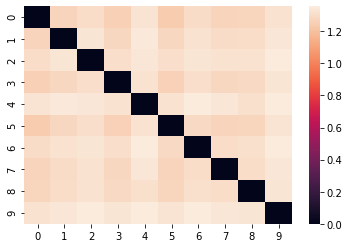

In [16]:
import seaborn as sns

sns.heatmap(dist_matrix)

In [10]:
print(dist_matrix)

[[0.         1.27624171 1.28354966 1.24302193 1.30682681 1.22107021
  1.28245251 1.25428433 1.2585167  1.30184529]
 [1.27624171 0.         1.29776304 1.28127525 1.34379741 1.27074878
  1.31271231 1.28162531 1.31060984 1.32676786]
 [1.28354966 1.29776304 0.         1.26761457 1.32933658 1.27330489
  1.29294425 1.28581299 1.31875019 1.32898784]
 [1.24302193 1.28127525 1.26761457 0.         1.30972665 1.23730858
  1.29321547 1.27037027 1.29288051 1.31760641]
 [1.30682681 1.34379741 1.32933658 1.30972665 0.         1.29620059
  1.33297671 1.32956173 1.31455772 1.33623698]
 [1.22107021 1.27074878 1.27330489 1.23730858 1.29620059 0.
  1.26507873 1.24702914 1.25219653 1.30081915]
 [1.28245251 1.31271231 1.29294425 1.29321547 1.33297671 1.26507873
  0.         1.284231   1.30897981 1.32940625]
 [1.25428433 1.28162531 1.28581299 1.27037027 1.32956173 1.24702914
  1.284231   0.         1.30004529 1.31906448]
 [1.2585167  1.31060984 1.31875019 1.29288051 1.31455772 1.25219653
  1.30897981 1.30004